<a href="https://colab.research.google.com/github/dozetype/pytorch-notes/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.6.0+cu124'

# Preparing Data


In [263]:
#y = a + bx
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias


In [264]:
X[:10], len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50)

In [265]:
Y[:10], len(Y)

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [266]:
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

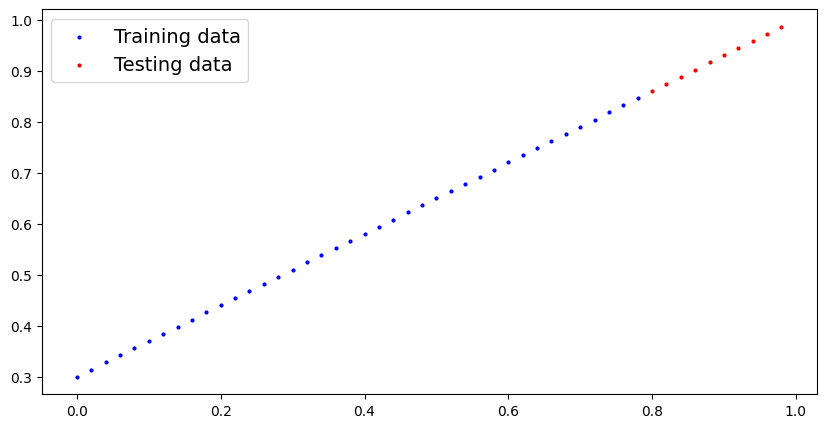

In [267]:
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=None):
  # Plots training data, test data and compares predictions
  plt.figure(figsize=(10,5))

  # Plots Training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plots Testing data
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if(predictions is not None):
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size":14})
plot_predictions()

## 2. Build Model


In [268]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x) -> torch.Tensor: # Overrides default forward() from nn.Module
        return self.weight*x + self.bias

In [269]:
# torch.manual_seed(9)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()), '\n')
print(model_0.state_dict())

[Parameter containing:
tensor([0.6946], requires_grad=True), Parameter containing:
tensor([0.2213], requires_grad=True)] 

OrderedDict([('weight', tensor([0.6946])), ('bias', tensor([0.2213]))])


In [270]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds
# plot_predictions(predictions=y_preds)

tensor([[0.7770],
        [0.7909],
        [0.8047],
        [0.8186],
        [0.8325],
        [0.8464],
        [0.8603],
        [0.8742],
        [0.8881],
        [0.9020]])

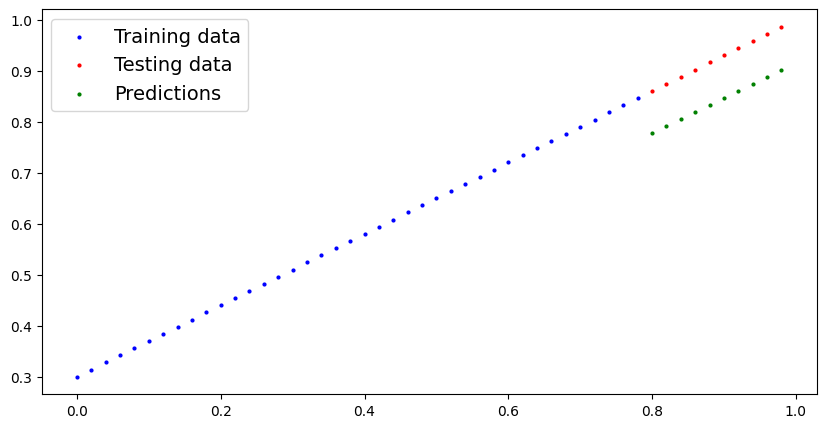

In [271]:
plot_predictions(predictions=y_preds)

Loss Function

In [272]:
MAE_loss = torch.mean(torch.abs(Y_test - y_preds))
loss_fn = nn.L1Loss();
print(MAE_loss)
print(torch.nn.L1Loss()(Y_test, y_preds))

tensor(0.0835)
tensor(0.0835)


In [273]:
# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [274]:
# Track different values
epoch_counter = 0
epoch_count = []
loss_values = []
test_loss_values = []

In [279]:
epochs = 100

### Training a model
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train) # calls __call__() which includes forward() and many things

    # 2. Calculate the loss
    loss = loss_fn(y_pred, Y_train)
    # print(loss)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

    if(epoch % 10 == 0):
        model_0.eval()
        with torch.inference_mode():
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, Y_test)
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

            epoch_count.append(epoch_counter)
            epoch_counter += 10
            loss_values.append(loss)
            test_loss_values.append(test_loss)

print(model_0.state_dict()) # turn of gradient tracking

Epoch: 0 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 10 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 20 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 30 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 40 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 50 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 60 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 70 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 80 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
Epoch: 90 | Loss: 0.008994252420961857 | Test loss: 0.005395454354584217
OrderedDict([('weight', tensor([0.7018])), ('bias', tensor([0.2903]))])


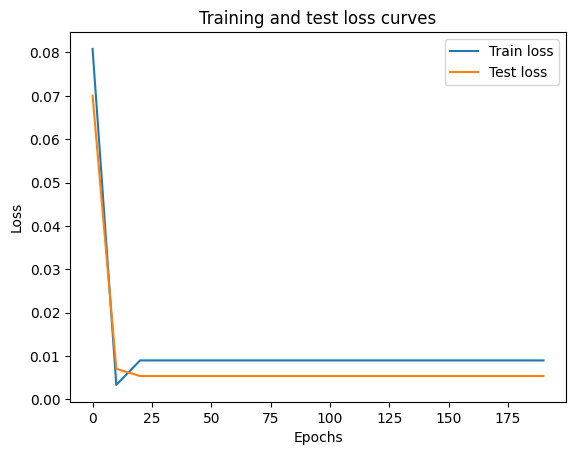

In [282]:
# Plotting loss's per epoch
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

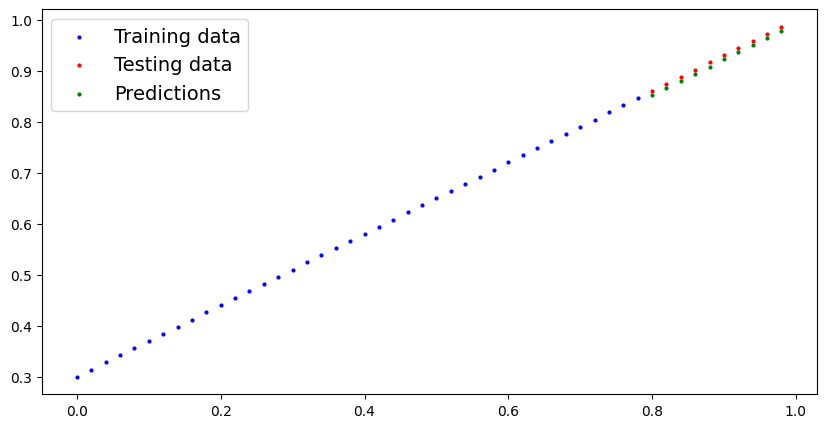

In [281]:
# Result
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)